In [41]:
import pandas as pd

# read excel file sheets into separate df
excel_path = '/Users/sheetalsudhir/Documents/BADMBuddies/data/2022_County_Health_Rankings_Data.xlsx'
df_outcomes_rankings = pd.read_excel(excel_path, "Outcomes & Factors Rankings")
df_outcomes_subrankings = pd.read_excel(excel_path, "Outcomes & Factors SubRankings")
df_ranked_measure = pd.read_excel(excel_path, "Ranked Measure Data")
df_additional_measure = pd.read_excel(excel_path, "Additional Measure Data")

# read csv data into pandas df
df_analytic_data = pd.read_csv('/Users/sheetalsudhir/Documents/BADMBuddies/data/chr_analytic_data2022.csv')
df_trends_data = pd.read_csv('/Users/sheetalsudhir/Documents/BADMBuddies/data/chr_trends_csv_2022.csv')


def rename_columns(columns, first_row):
    prefix = ""
    for c in columns:
        if "Unnamed:" not in c:
            prefix = c
        cIndex = columns.index(c)
        first_row[cIndex] = prefix + " " + first_row[cIndex]
    return 

def apply_rename_columns(df):
    x = df.columns.tolist()
    y = list(df.loc[0])
    rename_columns(x, y)
    
    df.columns = y

    df = df.iloc[1: , :]
    df_ranked_measure.reset_index(drop = True)
    
    return df

df_outcomes_rankings = apply_rename_columns(df_outcomes_rankings)
df_outcomes_subrankings = apply_rename_columns(df_outcomes_subrankings)
df_ranked_measure = apply_rename_columns(df_ranked_measure)
df_additional_measure = apply_rename_columns(df_additional_measure)

massive_df = df_outcomes_rankings.merge(df_outcomes_subrankings, on=[" FIPS"," County"," State"])
massive_df = massive_df.merge(df_ranked_measure, on=[" FIPS"," County"," State"])
massive_df = massive_df.merge(df_additional_measure, on=[" FIPS"," County"," State"])

/var/folders/_b/_1fq258d0plcmql89bjhj05r0000gn/T/ipykernel_1062/1735773049.py:11: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [56]:
df_trends_data

,yearspan,measurename,statecode,countycode,county,state,numerator,denominator,rawvalue,cilow,cihigh,measureid,chrreleaseyear,differflag,trendbreak
0,1997-1999,Premature death,0,0,United States,US,3138165.0,NaN,"7,705.20","7,693.70","7,716.60",1,NaN,NaN,NaN
1,1998-2000,Premature death,0,0,United States,US,3133298.0,NaN,"7,615.00","7,603.70","7,626.30",1,NaN,NaN,NaN
2,1999-2001,Premature death,0,0,United States,US,3139234.0,NaN,"7,568.70","7,557.50","7,579.80",1,NaN,NaN,NaN
3,2000-2002,Premature death,0,0,United States,US,3147222.0,NaN,"7,535.00","7,524.00","7,546.10",1,NaN,NaN,NaN
4,2001-2003,Premature death,0,0,United States,US,3159913.0,NaN,"7,498.80","7,487.80","7,509.80",1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651328,2015,School funding,56,45,Weston County,WY,NaN,NaN,"9,957.55",NaN,NaN,169,NaN,NaN,NaN
651329,2016,School funding,56,45,Weston County,WY,NaN,NaN,"10,020.77",NaN,NaN,169,NaN,NaN,NaN
651330,2017,School funding,56,45,Weston County,WY,NaN,NaN,"10,622.87",NaN,NaN,169,NaN,NaN,NaN
651331,2018,School funding,56,45,Weston County,WY,NaN,NaN,"9,029.87",NaN,NaN,169,NaN,NaN,NaN


In [57]:
import seaborn as sns

sns.heatmap(massive_df)

ValueError: could not convert string to float: 'Alabama'

In [97]:
massive_df

,FIPS,State,County,# of Ranked Counties_x,Health Outcomes Rank,Health Outcomes Quartile,Health Factors Rank,Health Factors Quartile,# of Ranked Counties_y,Length of Life Rank,...,% Hispanic % Hispanic,% non-Hispanic white # Non-Hispanic white,% non-Hispanic white % Non-Hispanic white,% not proficient in English # Not Proficient in English,% not proficient in English % Not Proficient in English,% not proficient in English 95% CI - Low,% not proficient in English 95% CI - High,% female % female,% rural # rural residents,% rural % rural
0,01000,Alabama,NaN,67,NaN,NaN,NaN,NaN,67,NaN,...,4.603384,3205777,65.137786,46887,1.019448,0.966651,1.072245,51.702722,1957932,40.963183
1,01001,Alabama,Autauga,67,6,1,9,1,67,4,...,3.100899,41079,73.16591,363,0.692695,0.170101,1.21529,51.507703,22921,42.002162
2,01003,Alabama,Baldwin,67,2,1,3,1,67,5,...,4.63393,191015,83.308256,1593,0.772068,0.491265,1.052871,51.589057,77060,42.279099
3,01005,Alabama,Barbour,67,56,4,60,4,67,52,...,4.672821,11130,45.264143,433,1.827467,0.795026,2.859908,47.1837,18613,67.789635
4,01007,Alabama,Bibb,67,31,2,50,3,67,31,...,2.931876,16420,74.17781,75,0.355097,0,0.962851,46.815143,15663,68.352607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,23,18,4,15,3,23,17,...,16.188222,33795,79.195276,321,0.792945,0.290072,1.295818,48.36079,4782,10.916313
3189,56039,Wyoming,Teton,23,1,1,1,1,23,1,...,14.950845,19036,81.014598,668,2.994173,1.445084,4.543262,48.133804,9887,46.43092
3190,56041,Wyoming,Uinta,23,21,4,14,3,23,20,...,9.903537,17548,86.806827,237,1.253305,0.192118,2.314492,49.394014,9101,43.095937
3191,56043,Wyoming,Washakie,23,7,2,9,2,23,8,...,14.162371,6400,82.474227,16,0.21359,0,1.275335,49.046392,3068,35.954529


In [121]:
# dont really need this, imputing should take care of this

thingies = [' FIPS', ' State', ' County', 'Other primary care providers Primary Care Physicians Ratio', 'Dentists Dentist Ratio', 'Mental health providers Mental Health Provider Ratio', 'Drinking water violations Presence of Water Violation', 'Other primary care providers Other Primary Care Provider Ratio']
massive_df2 = massive_df.loc[:, ~massive_df.columns.isin(thingies)]

In [126]:
def impute(df):
    impute_cols = ["Premature death Years of Potential Life Lost Rate", "Poor or fair health % Fair or Poor Health", "Poor physical health days Average Number of Physically Unhealthy Days", "Poor mental health days Average Number of Mentally Unhealthy Days", "Low birthweight % Low birthweight", "Adult smoking % Smokers", "Adult obesity % Adults with Obesity", "Food environment index Food Environment Index", "Physical inactivity % Physically Inactive", "Access to exercise opportunities % With Access to Exercise Opportunities", "Excessive drinking % Excessive Drinking", "Alcohol-impaired driving deaths % Driving Deaths with Alcohol Involvement", "Sexually transmitted infections Chlamydia Rate", "Teen births Teen Birth Rate", "Uninsured % Uninsured", "Primary care physicians Primary Care Physicians Rate", "Dentists Dentist Rate", "Mental health providers Mental Health Provider Rate", "Preventable hospital stays Preventable Hospitalization Rate", "Mammography screening % With Annual Mammogram", "Flu vaccinations % Vaccinated", "High school completion % Completed High School", "Some college % Some College", "Unemployment % Unemployed", "Children in poverty % Children in Poverty", "Income inequality Income Ratio", "Children in single-parent households % Children in Single-Parent Households", "Social associations Social Association Rate", "Violent crime Violent Crime Rate", "Injury deaths Injury Death Rate", "Air pollution - particulate matter Average Daily PM2.5", "Severe housing problems % Severe Housing Problems", "Driving alone to work % Drive Alone to Work", "Long commute - driving alone % Long Commute - Drives Alone"
    , "COVID-19 age-adjusted mortality COVID-19 death rate", "Life expectancy Life Expectancy", "Premature age-adjusted mortality Age-adjusted Death Rate", "Child mortality Child Mortality Rate", "Infant mortality Infant Mortality Rate", "Frequent physical distress % Frequent Physical Distress", "Frequent mental distress % Frequent Mental Distress", "Diabetes prevalence % Adults with Diabetes", "HIV prevalence HIV Prevalence Rate", "Food insecurity % Food Insecure", "Limited access to healthy foods % Limited Access to Healthy Foods", "Drug overdose deaths Drug Overdose Mortality Rate", "Motor vehicle crash deaths Motor Vehicle Mortality Rate", "Insufficient sleep % Insufficient Sleep", "Uninsured adults % Uninsured", "Uninsured children % Uninsured", "Other primary care providers Other Primary Care Provider Rate", "High school graduation High School Graduation Rate", "Disconnected youth % Disconnected Youth", "Reading scores Average Grade Performance", "Math scores Average Grade Performance", "School segregation Segregation index", "School funding adequacy School funding", "Gender pay gap Gender Pay Gap", "Median household income Median Household Income", "Children eligible for free or reduced price lunch % Enrolled in Free or Reduced Lunch", "Residential segregation - Black/white Segregation index", "Residential segregation - non-white/white Segregation Index", "Childcare cost burden % household income required for childcare expenses", "Childcare centers County Value", "Homicides Homicide Rate", "Suicides Suicide Rate (Age-Adjusted)", "Firearm fatalities Firearm Fatalities Rate", "Juvenile arrests Juvenile Arrest Rate", "Traffic volume Traffic Volume", "Homeownership % Homeowners", "Severe housing cost burden % Severe Housing Cost Burden", "Broadband access % Broadband Access", "Population Population", "% below 18 years of age % Less Than 18 Years of Age", "% 65 and older % 65 and Over", "% non-Hispanic Black % Black", "% American Indian & Alaska Native % American Indian & Alaska Native", "% Asian % Asian", "% Native Hawaiian/Other Pacific Islander % Native Hawaiian/Other Pacific Islander", "% Hispanic % Hispanic", "% non-Hispanic white % Non-Hispanic white", "% not proficient in English % Not Proficient in English", "% female % female", "% rural % rural"]

    imputed_df = pd.DataFrame()
    imputed_df.reset_index()

    for i in impute_cols:
        imputed_series = df.loc[:, i]
        median = df[i].median()
        #print(f'median: {median}')
        imputed_series.fillna(median, inplace=True)
        imputed_df.assign(i=imputed_series)
        # imputed_df2 = imputed_series.to_frame()
        # imputed_df2.reset_index()
        #print(f'df2: {imputed_df2}')
        #imputed_df = imputed_df.merge(imputed_series.reset_index(), on=['index'])
        imputed_df = pd.concat([imputed_df, imputed_series], axis=1)

    return imputed_df

In [128]:
final_df = impute(massive_df)

Life expectancy Life Expectancy                                                        Premature age-adjusted mortality Age-adjusted Death Rate                                -0.962294
Premature age-adjusted mortality Age-adjusted Death Rate                               Life expectancy Life Expectancy                                                         -0.962294
Life expectancy Life Expectancy                                                        Premature death Years of Potential Life Lost Rate                                       -0.899808
Premature death Years of Potential Life Lost Rate                                      Life expectancy Life Expectancy                                                         -0.899808
High school completion % Completed High School                                         Poor or fair health % Fair or Poor Health                                               -0.877879
                                                                           

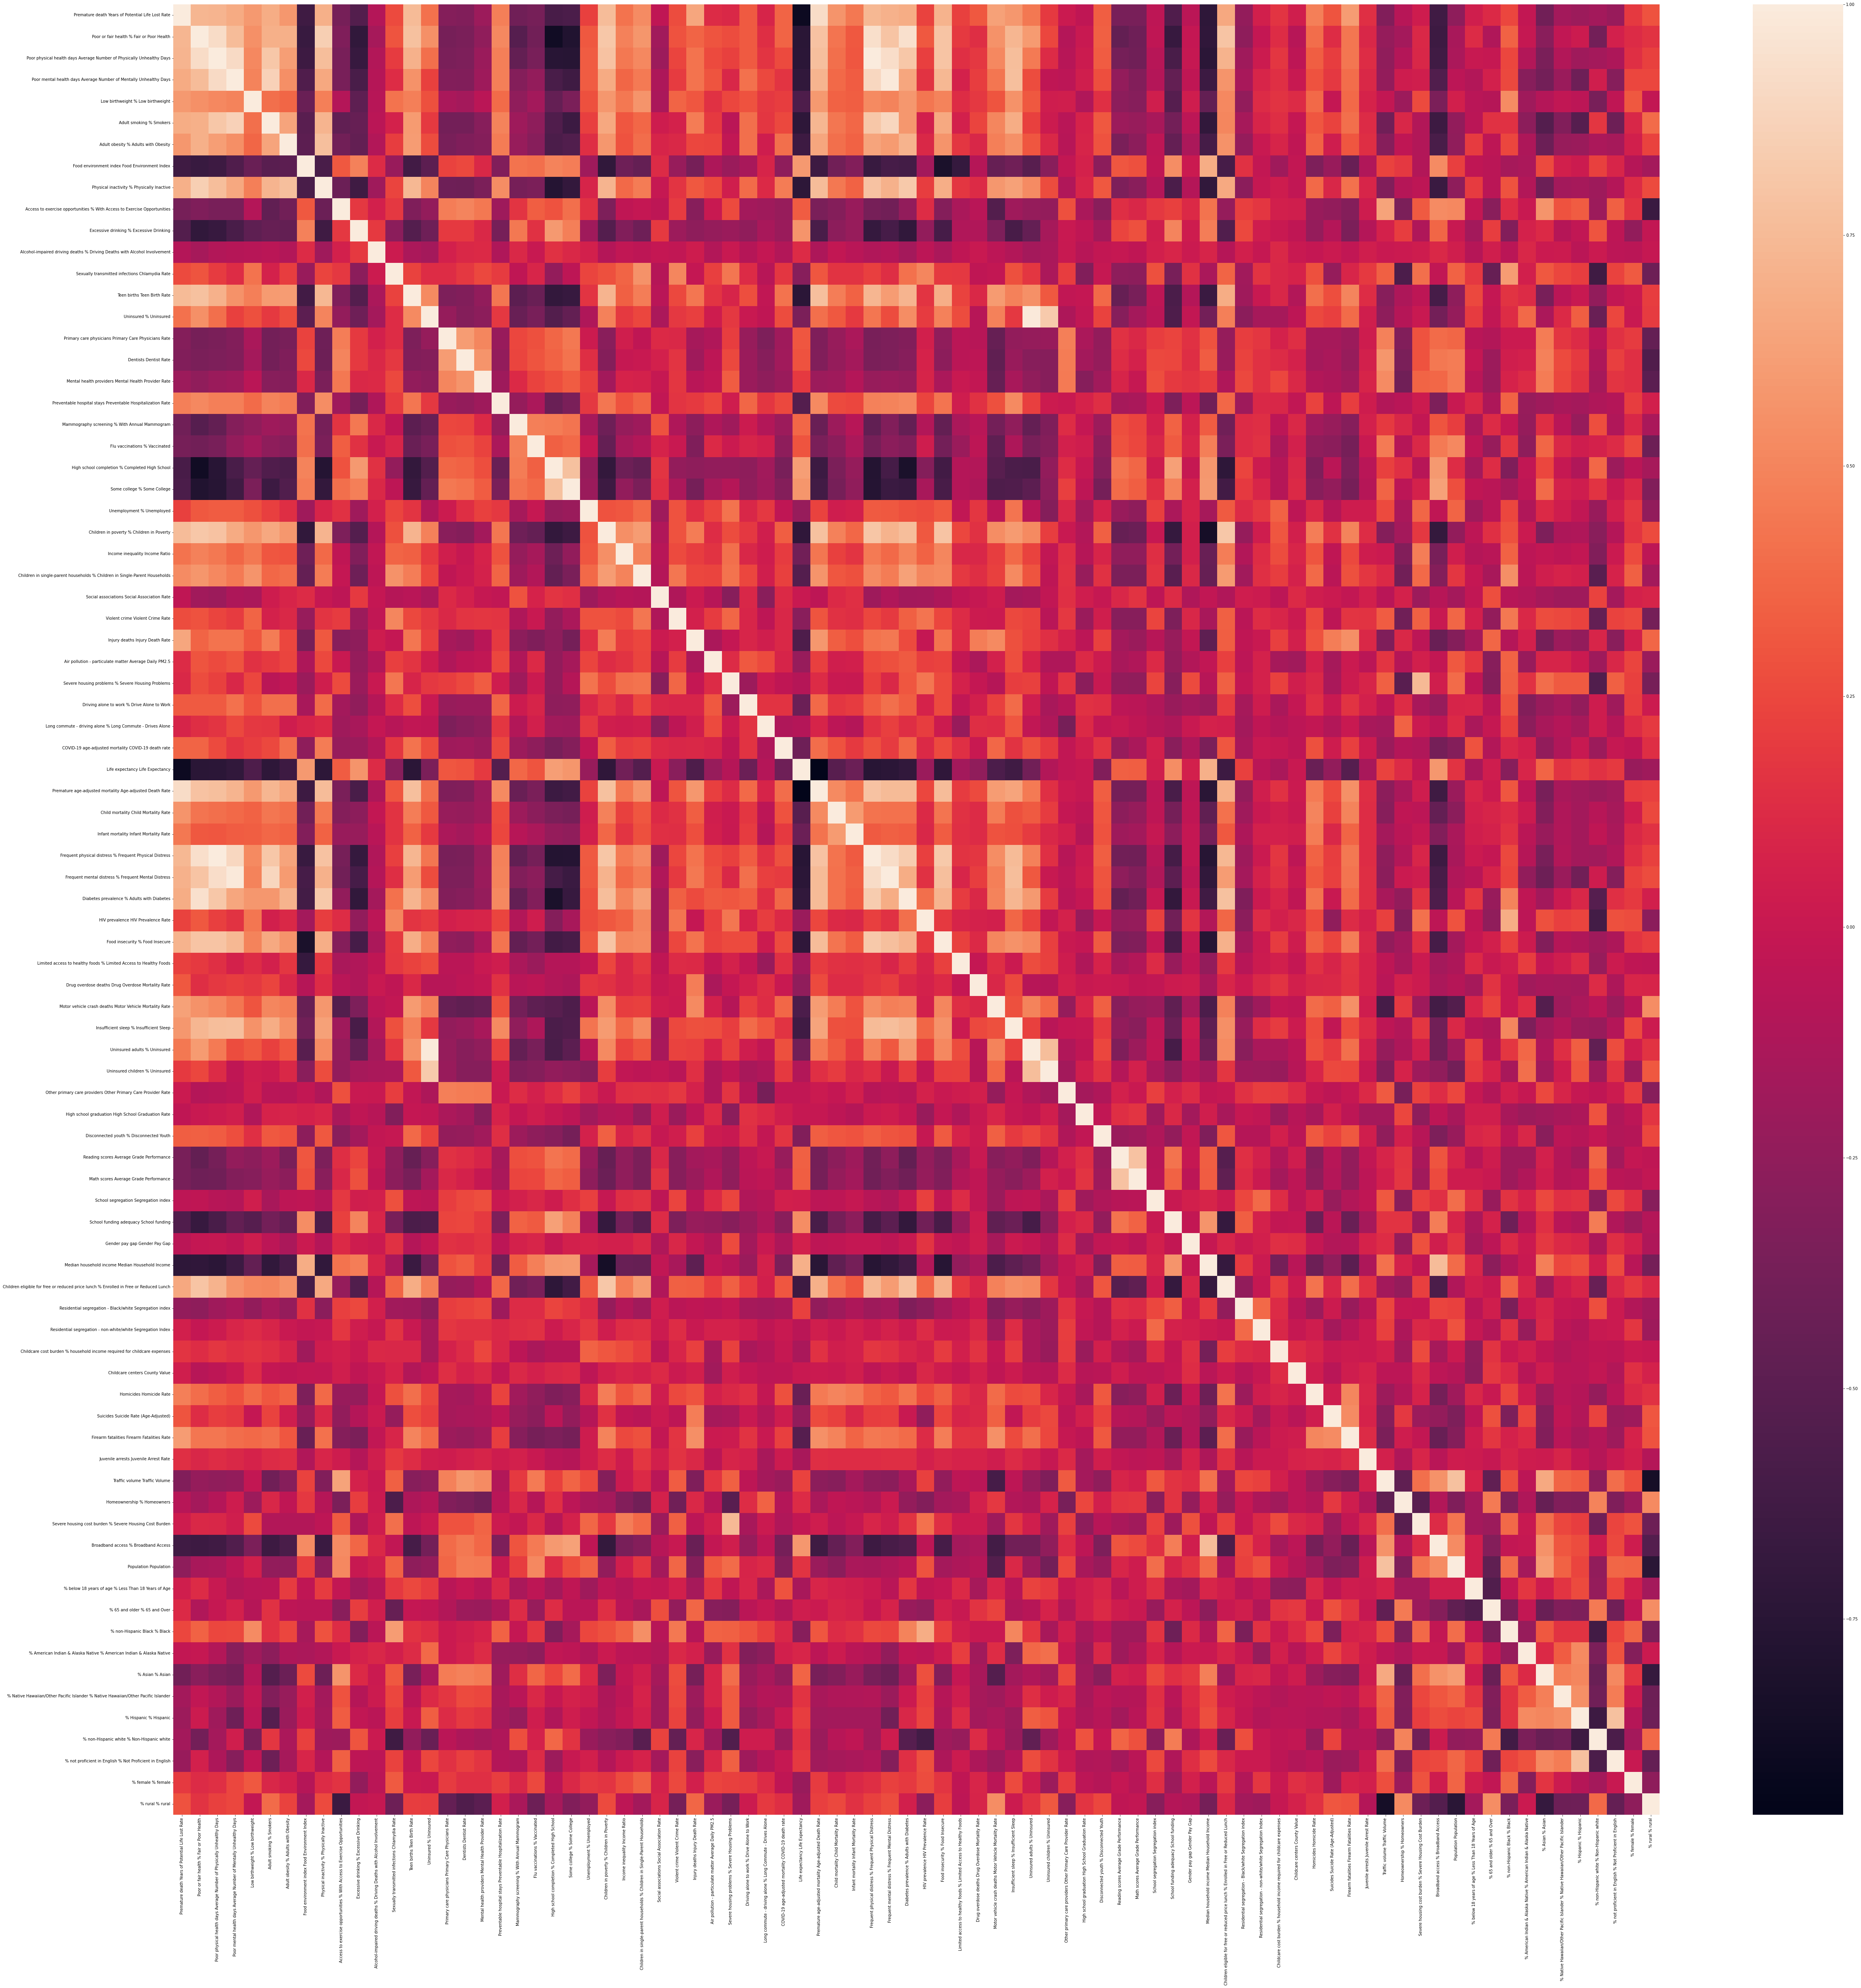

In [165]:
#df = preprocessing.get_final_df(preprocessing.df_outcomes_rankings, preprocessing.df_outcomes_subrankings, preprocessing.df_ranked_measure, preprocessing.df_additional_measure)
#display(df)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(84,84))
corr_mat = final_df.corr(method = 'spearman')
sns.heatmap(corr_mat)

#final_df.corr()

sorted_mat = corr_mat.unstack().sort_values()
print(sorted_mat)


import numpy as np 
fig, ax = plt.subplots(figsize=(84,84))
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, center=0, mask=mask)

plt.figure(figsize=(50,50))
new_heatmap = sns.heatmap(corr_mat[['Preventable hospital stays Preventable Hospitalization Rate']].sort_values(by='Preventable hospital stays Preventable Hospitalization Rate', ascending=False,), vmin=-1, vmax=1, annot = True)
new_heatmap.set_title("Test", fontdict={'fontsize':18}, pad=16)

In [151]:
df_analytic_data

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% female raw value,% female numerator,% female denominator,% female CI low,% female CI high,% rural raw value,% rural numerator,% rural denominator,% rural CI low,% rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2022,NaN,7281.9355638,4125218,917267406,...,0.5075447019,167227921,329484123,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2022,NaN,10350.071456,88086,13668498,...,0.5170272184,2544566,4921532,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2022,1,8027.3947267,836,156081,...,0.5150770327,28919,56145,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2022,1,8118.3582061,3377,614143,...,0.5158905651,118287,229287,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,599,122399,...,0.483608,20637,42673,NaN,NaN,0.109163,4782,43806,NaN,NaN
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,111,66036,...,0.481338,11310,23497,NaN,NaN,0.464309,9887,21294,NaN,NaN
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,287,57690,...,0.49394,9985,20215,NaN,NaN,0.430959,9101,21118,NaN,NaN
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,115,21075,...,0.490464,3806,7760,NaN,NaN,0.359545,3068,8533,NaN,NaN


In [152]:
df_trends_data

,yearspan,measurename,statecode,countycode,county,state,numerator,denominator,rawvalue,cilow,cihigh,measureid,chrreleaseyear,differflag,trendbreak
0,1997-1999,Premature death,0,0,United States,US,3138165.0,NaN,"7,705.20","7,693.70","7,716.60",1,NaN,NaN,NaN
1,1998-2000,Premature death,0,0,United States,US,3133298.0,NaN,"7,615.00","7,603.70","7,626.30",1,NaN,NaN,NaN
2,1999-2001,Premature death,0,0,United States,US,3139234.0,NaN,"7,568.70","7,557.50","7,579.80",1,NaN,NaN,NaN
3,2000-2002,Premature death,0,0,United States,US,3147222.0,NaN,"7,535.00","7,524.00","7,546.10",1,NaN,NaN,NaN
4,2001-2003,Premature death,0,0,United States,US,3159913.0,NaN,"7,498.80","7,487.80","7,509.80",1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651328,2015,School funding,56,45,Weston County,WY,NaN,NaN,"9,957.55",NaN,NaN,169,NaN,NaN,NaN
651329,2016,School funding,56,45,Weston County,WY,NaN,NaN,"10,020.77",NaN,NaN,169,NaN,NaN,NaN
651330,2017,School funding,56,45,Weston County,WY,NaN,NaN,"10,622.87",NaN,NaN,169,NaN,NaN,NaN
651331,2018,School funding,56,45,Weston County,WY,NaN,NaN,"9,029.87",NaN,NaN,169,NaN,NaN,NaN


In [170]:
# get rid of outliers
import numpy as np
from scipy import stats

temp = final_df[(np.abs(stats.zscore(final_df)) < 3).all(axis=1)]

# input data into model for feature selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# create feature variables
X = temp.drop('Preventable hospital stays Preventable Hospitalization Rate',axis= 1)
y = temp['Preventable hospital stays Preventable Hospitalization Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)
inital_predictions = model.predict(X_test)

print('mean_squared_error : ', mean_squared_error(y_test, inital_predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, inital_predictions))

# import numpy as np 
# fig, ax = plt.subplots(figsize=(84,84))
# mask2 = np.triu(np.ones_like(corr_mat))
# sns.heatmap(corr_mat2, annot=True, vmax=1, vmin=-1, center=0, mask=mask2)

# tower thingy with outlier data 
corr_mat2 = temp.corr(method = 'spearman')

plt.figure(figsize=(50,50))
new_heatmap2 = sns.heatmap(corr_mat2[['Preventable hospital stays Preventable Hospitalization Rate']].sort_values(by='Preventable hospital stays Preventable Hospitalization Rate', ascending=False,), vmin=-1, vmax=1, annot = True, cmap='BrBG')
new_heatmap2.set_title("Test", fontdict={'fontsize':18}, pad=16)